#**IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV

#**LOAD DATA**

In [2]:
# Load data
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
df = pd.read_parquet('df_train_full.parquet', engine='fastparquet')
df 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AVG_BUREAU_STATUS,STATUS_BIN,AVG_DAY_OVERDUE,DEBT_CREDIT_RATIO,AMT_BALANCE,AMT_PAYMENT_TOTAL_CURRENT,AMT_CREDIT_LIMIT_ACTUAL,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_INSTALMENT,AMT_PAYMENT,DIFF_INSTALLMENT_PAYMENT,avg_dpd
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,865055.565,245781.00,0.0,tidak terlambat,0.0,0.284122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,XAP,Approved,-606.0,XNA,XAP,Unknown,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,219625.695,219625.695,0.0,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1017400.500,0.00,0.0,tidak terlambat,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,0.0,900000.0,FRIDAY,12.0,Y,1.0,0.000000,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,1150977.330,1150977.330,0.0,0.000000
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1017400.500,0.00,0.0,tidak terlam

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 112 entries, SK_ID_CURR to avg_dpd
dtypes: float64(61), int64(21), object(30)
memory usage: 1.2+ GB


In [4]:
# Periksa nilai nilai dalam setiap kolom kategorikal
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"\nKolom: {df[col].value_counts()}")


Kolom: NAME_CONTRACT_TYPE_x
Cash loans         1320679
Revolving loans     109476
Name: count, dtype: int64

Kolom: CODE_GENDER
F      964822
M      465278
XNA        55
Name: count, dtype: int64

Kolom: FLAG_OWN_CAR
N    947544
Y    482611
Name: count, dtype: int64

Kolom: FLAG_OWN_REALTY
Y    1031672
N     398483
Name: count, dtype: int64

Kolom: NAME_TYPE_SUITE_x
Unaccompanied      1171310
Family              186208
Spouse, partner      47371
Children             14091
Other_B               6860
Other_A               3081
Group of people       1234
Name: count, dtype: int64

Kolom: NAME_INCOME_TYPE
Working                 730613
Commercial associate    327563
Pensioner               276323
State servant            95468
Unemployed                 129
Student                     30
Maternity leave             19
Businessman                 10
Name: count, dtype: int64

Kolom: NAME_EDUCATION_TYPE
Secondary / secondary special    1046822
Higher education                  319692
Incomp

In [5]:
pd.set_option('display.max_columns', None)

#pilih kolom-kolom bertipe objek dan simpan dalam variabel bernama 'categoric'
categoric = df.select_dtypes(include=['object'])

#pilih kolom-kolom bertipe numerik dan simpan dalam variabel bernama 'numeric'
numeric = df.select_dtypes(include=['int64', 'float64'])

#print jumlah baris dan kolom
rows = df.shape[0]
column = df.shape[1]
print(f"Jumlah baris: {rows}")
print(f"Jumlah kolom: {column}")

#print ringkasan statistik data kategorikal
print("\nRingkasan Statistik Data Kategorikal")
display(categoric.describe().T)

#print ringkasan statistik data numerical
print("\nRingkasan Statistik Data Numerical")
display(numeric.describe().T)

Jumlah baris: 1430155
Jumlah kolom: 112

Ringkasan Statistik Data Kategorikal


,count,unique,top,freq
NAME_CONTRACT_TYPE_x,1430155,2,Cash loans,1320679
CODE_GENDER,1430155,3,F,964822
FLAG_OWN_CAR,1430155,2,N,947544
FLAG_OWN_REALTY,1430155,2,Y,1031672
NAME_TYPE_SUITE_x,1430155,7,Unaccompanied,1171310
NAME_INCOME_TYPE,1430155,8,Working,730613
NAME_EDUCATION_TYPE,1430155,5,Secondary / secondary special,1046822
NAME_FAMILY_STATUS,1430155,6,Married,921040
NAME_HOUSING_TYPE,1430155,6,House / apartment,1279761
OCCUPATION_TYPE,1430155,18,Laborers,716492



Ringkasan Statistik Data Numerical


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1430155.0,278470.247890,102802.095340,100002.00,189361.0,278956.00,367509.000000,4.562550e+05
TARGET,1430155.0,0.086242,0.280722,0.00,0.0,0.00,0.000000,1.000000e+00
CNT_CHILDREN,1430155.0,0.403887,0.716518,0.00,0.0,0.00,1.000000,1.900000e+01
AMT_INCOME_TOTAL,1430155.0,173603.622588,198330.285285,25650.00,112500.0,157500.00,211500.000000,1.170000e+08
AMT_CREDIT_x,1430155.0,589338.592951,387420.355419,45000.00,270000.0,508495.50,808650.000000,4.050000e+06
...,...,...,...,...,...,...,...,...
NFLAG_INSURED_ON_APPROVAL,1413701.0,0.199366,0.399524,0.00,0.0,0.00,0.000000,1.000000e+00
AMT_INSTALMENT,1413701.0,39742.641579,161714.586380,0.00,0.0,0.00,0.000000,1.428584e+07
AMT_PAYMENT,1413701.0,40109.298835,171216.108877,0.00,0.0,0.00,0.000000,1.428584e+07
DIFF_INSTALLMENT_PAYMENT,1413701.0,-366.657256,39122.167471,-2482015.23,0.0,0.00,0.000000,2.602349e+06


#**EDA**

### **Check Missing Value**

In [6]:
# Memeriksa duplicate value
duplicate_rows = df.duplicated()
print(f"Jumlah baris duplikat: {duplicate_rows.sum()}")

# fungsi untuk menghitung dan menampilkan kolom missing value
def check_nan(df):
  null_values = df.isnull().sum()
  # buat dataframe
  nvc = pd.DataFrame(null_values[null_values > 0].sort_values(), columns=['Total Null Values'])  # Hanya ambil kolom dengan nilai null
  nvc['Percentage'] = (nvc['Total Null Values'] / df.shape[0]) * 100
  nvc['Data Type'] = [df[col].dtype for col in nvc.index]

  # Urutkan berdasarkan total nilai null dan persentase
  nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)

  # Tampilkan hasil dengan gaya
  return nvc

# Panggil fungsi dan simpan hasilnya
miss_result = check_nan(df)

miss_result

Jumlah baris duplikat: 0


,Total Null Values,Percentage,Data Type
SK_ID_PREV,16454,1.150505,float64
NAME_CONTRACT_TYPE_y,16454,1.150505,object
AMT_ANNUITY_y,16454,1.150505,float64
AMT_APPLICATION,16454,1.150505,float64
AMT_CREDIT_y,16454,1.150505,float64
AMT_DOWN_PAYMENT,16454,1.150505,float64
AMT_GOODS_PRICE_y,16454,1.150505,float64
WEEKDAY_APPR_PROCESS_START_y,16454,1.150505,object
HOUR_APPR_PROCESS_START_y,16454,1.150505,float64
FLAG_LAST_APPL_PER_CONTRACT,16454,1.150505,object


jumlah kolom yang terdapat missing value dan proporsi missing value nya relatif sangat kecil. Dan juga beberapa dari kolom tersebut punya alasan yang wajar mengapa value nya NaN (contoh avg_dpd NaN berarti beberapa orang tidak pernah terlambat bayar, dan DAYS_TERMINATION NaN berarti beberapa orang tidak pernah kena terminasi), maka missing value tersebut dibiarkan saja.

### **Handled Invalid Values**

In [7]:
df_full = df.copy()
df_full['AGE'] = round(abs(df_full['DAYS_BIRTH'] / 365.25)).astype(int)

def age_group(age):
  if age < 30:
    return 'Young'
  elif age < 44:
    return 'Middle Age'
  else:
    return 'Senior'

df_full['AGE_GROUP'] = df_full['AGE'].apply(age_group)

# make a function to replace columns value contains Unknown with np.nan
def replace_unknown(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].replace('Unknown', np.nan)
    return df

df_full = replace_unknown(df_full)

# make a function to replace columns value contains XNA or XAP with np.nan
def replace_xna_xap(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].replace(['XNA', 'XAP'], np.nan)
    return df

df_full = replace_xna_xap(df_full)

# replace abnormal value
replace_val = {4.5 : 5,
               0.5 : 1}
df_full['CNT_FAM_MEMBERS'] = df_full['CNT_FAM_MEMBERS'].replace(replace_val)

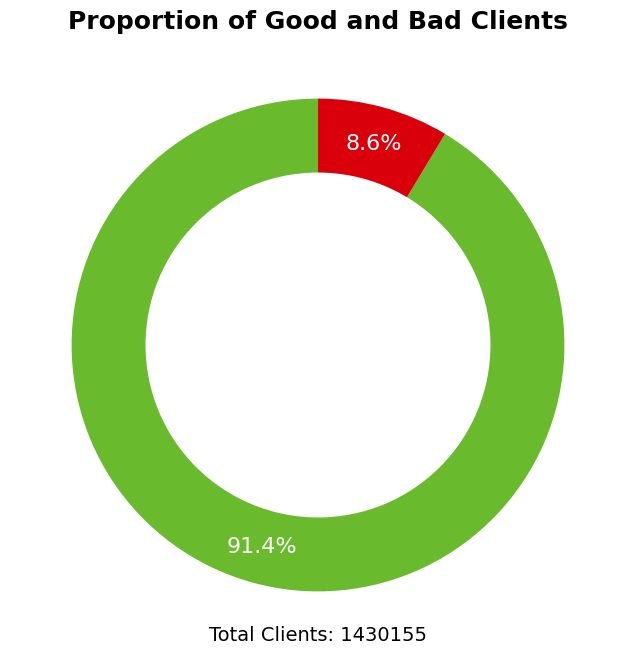

In [8]:
# Data
counts = df_full['TARGET'].value_counts(normalize=True)
labels = ['Good Clients', 'Bad Clients']
colors = ['#69ba2d', '#d9000c']

# Pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(counts, labels=labels, colors=colors,
                                  autopct='%1.1f%%', startangle=90, pctdistance=0.85,
                                  textprops={'color': 'white', 'fontsize': 16})

# Donut hole
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Title
plt.title('Proportion of Good and Bad Clients', fontsize=18, fontweight='bold')
plt.text(0, -1.2, f"Total Clients: {df_full.shape[0]}", fontsize=14, ha='center')

plt.show()

### **Train Test Val Split**

In [10]:
print(df_full['TARGET'].value_counts())

TARGET
0    1306815
1     123340
Name: count, dtype: int64


In [11]:
X = df_full.drop(columns='TARGET')
y = df_full['TARGET']

# Train-test split
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Train-val split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

print("Train shape   :", X_train.shape, y_train.shape)
print("Val shape     :", X_val.shape, y_val.shape)
print("Test shape    :", X_test.shape, y_test.shape)

Train shape   : (858093, 113) (858093,)
Val shape     : (286031, 113) (286031,)
Test shape    : (286031, 113) (286031,)


In [12]:
y

0          1
1          0
2          0
3          0
4          0
          ..
1430150    0
1430151    0
1430152    0
1430153    0
1430154    0
Name: TARGET, Length: 1430155, dtype: int64

### **Handling Outliers**

In [13]:
def hand_outliers(data, columns):
  #buat salinan datanya agar data asli tidak termodifikasi
  result = data.copy()

  for col in columns:
    #hitung kuartil pertama
    Q1 = result[col].quantile(0.25)
    #hitung kuartul ketiga
    Q3 = result[col].quantile(0.75)
    #hitung interkuartil (IQR)
    IQR = Q3 - Q1
    #hitung batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace values in the current column that are less than the lower bound with the lower bound
    result[col] = np.where(result[col] < lower_bound, lower_bound, result[col])
    # Replace values in the current column that are greater than the upper bound with the upper bound
    result[col] = np.where(result[col] > upper_bound, upper_bound, result[col])
  return result

outliers = X_train.select_dtypes(include='number').columns
X_train = hand_outliers(X_train, outliers)


In [14]:
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Convert semua kolom object ke category
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')
    X_test[col] = X_test[col].astype('category')

#cek apakah ada yg masih belum terkonversi
print("Kolom object di X_train:", X_train.select_dtypes('object').columns.tolist())
print("Kolom object di X_val:", X_val.select_dtypes('object').columns.tolist())
print("Kolom object di X_test:", X_test.select_dtypes('object').columns.tolist())

Kolom object di X_train: []
Kolom object di X_val: []
Kolom object di X_test: []


### **Model Building**

In [31]:
def get_custom_palette():
    return [
        "#2E2C36",  # Dark Gray / Charcoal
        "#701F1F",  # Dark Red / Maroon
        "#D33A2E",  # Bright Red
        "#FFFFFF",  # White
        "#F2E8DC",  # Warm Beige
        "#E3B505",  # Gold / Mustard
        "#4ECDC4",  # Teal / Soft Cyan
        "#1B9AAA",  # Deep Sky Blue
        "#FF8552",  # Soft Orange Coral
        "#2A9D8F"   # Muted Turquoise Green
    ]

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def eval_model(model, X_test, y_test, threshold):
  palette = get_custom_palette()

  pred_test = model.predict_proba(X_test)[:, 1]

  #auc score
  print('Test AUC:', roc_auc_score(y_test, pred_test))

  #Accuracy Score
  print('Test Accuracy:', (y_test == (pred_test > threshold)).mean())

  #Confusion Matrix
  print("\nConfusion Matrix (Test):")
  cm = confusion_matrix(y_test, pred_test > threshold)
  sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette([palette[1], palette[2]]), xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

  #Classification report
  print("\nClassification Report (Test): ")
  print(classification_report(y_test, pred_test > threshold))

  #Roc Curve
  fpr, tpr, _ = roc_curve(y_test, pred_test)
  roc_auc = roc_auc_score(y_test, pred_test)
  plt.plot(fpr, tpr, color=palette[2], lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color=palette[0], lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.show()


### **Hyperparameter Tuning**

In [18]:
#Hyperparameter Tuning LightGBM
import lightgbm as lgb

num_leaves = [int(x) for x in np.linspace(start=20, stop=120, num=10)]
max_depth = [-1]
learning_rate = [0.01, 0.05, 0.1]
n_estimators = [100, 300, 500]
min_child_samples = [int(x) for x in np.linspace(start=20, stop=100, num=5)]

random_grid = {
    'num_leaves': num_leaves,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'min_child_samples': min_child_samples
}

#base model lightGBM
lgbm = LGBMClassifier(class_weight='balanced', verbosity=-1, metric='auc', random_state=42, n_jobs=-1, early_stopping_rounds=20)
lgbm_search = RandomizedSearchCV(estimator=lgbm, param_distributions=random_grid, n_iter=100, cv=3, scoring='roc_auc', random_state=42, error_score='raise')
lgbm_search.fit(X_train, y_train, eval_set=[(X_val, y_val)])

#print best parameternya
print("Parameter terbaik: ", lgbm_search.best_params_)

Parameter terbaik:  {'num_leaves': 120, 'n_estimators': 500, 'min_child_samples': 60, 'max_depth': -1, 'learning_rate': 0.1}


In [19]:
print("Best AUC Score: ", lgbm_search.best_score_)

Best AUC Score:  0.94937230795721


In [28]:
# Final Training
#X_full = np.vstack([X_train, X_val])
#y_full = np.hstack([y_train, y_val])

#X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(
#    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
#)

final_model = LGBMClassifier(**lgbm_search.best_params_, class_weight='balanced',  verbosity=-1, n_jobs=-1, random_state=42)
final_model.fit(X_train, y_train)


,boosting_type,'gbdt'
,num_leaves,120
,max_depth,-1
,learning_rate,0.1
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,60


Test AUC: 0.963609023373379
Test Accuracy: 0.8857221769668323

Confusion Matrix (Test):


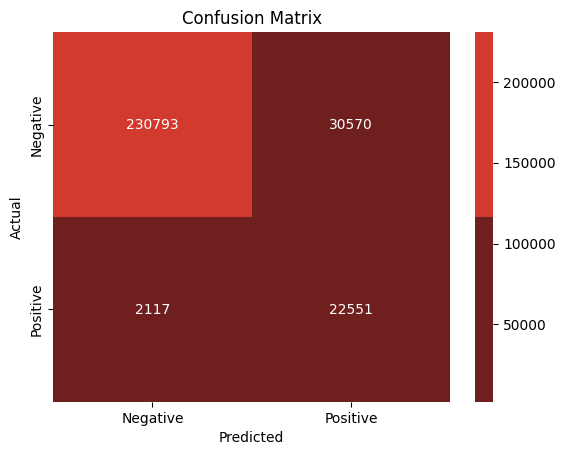


Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    261363
           1       0.42      0.91      0.58     24668

    accuracy                           0.89    286031
   macro avg       0.71      0.90      0.76    286031
weighted avg       0.94      0.89      0.90    286031



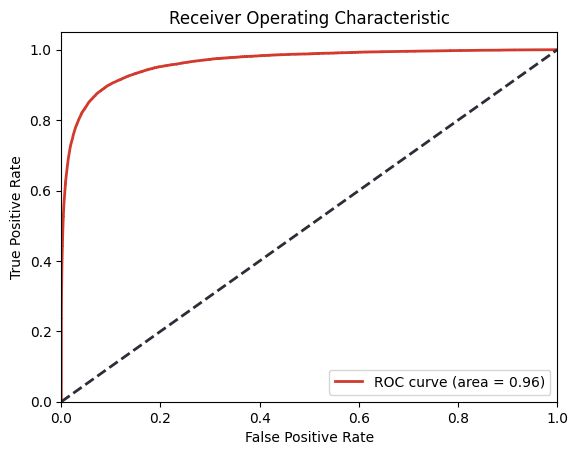

In [33]:
# prediction
eval_model(final_model, X_test=X_test, y_test=y_test, threshold=0.42)

In [43]:
# Untuk model Logistic Regression harus di encoding dulu data kategorikalnya
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

cat_cols = X_train.select_dtypes(include='category').columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Buat preprocessor
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

def to_float32(X):
    return X.astype(np.float32)

preprocessor = make_column_transformer(
    (FunctionTransformer(to_float32), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=True, dtype=np.float32),
     make_column_selector(dtype_include=['object', 'category'])),
    remainder='drop',
    # Force output sparse dan hindari konversi ke float64
    verbose_feature_names_out=False
)
# Terapkan ke semua data
X_train_enc = preprocessor.fit_transform(X_train)
X_val_enc = preprocessor.transform(X_val)
X_test_enc = preprocessor.transform(X_test)

# Pastikan:
assert X_train_enc.dtype == np.float32
assert hasattr(X_train_enc, 'data')  # sparse punya .data

# pastikan y numerik
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

MemoryError: Unable to allocate 6.55 MiB for an array with shape (1, 858093) and data type float64

In [36]:
#Hyperparameter Tuning LogisticRegression
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]
solver = ['liblinear', 'saga']

random_grid = {
    'penalty': penalty,
    'C': C,
    'solver': solver
}

#base model LogisticRegressionn
lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_search = RandomizedSearchCV(estimator=lr, param_distributions=random_grid, n_iter=10, cv=3, n_jobs=-1,random_state=42)

lr_search.fit(X_train_enc, y_train)

#print best paramerter
print("Best params:", lr_search.best_params_)
print("Best CV AUC:", lr_search.best_score_)

MemoryError: Unable to allocate 1.40 GiB for an array with shape (572062, 328) and data type float64